In [25]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [26]:
%%time
# Generate a sample dataset
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, random_state=666)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

CPU times: user 9.54 ms, sys: 1.69 ms, total: 11.2 ms
Wall time: 9.91 ms


In [27]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [29]:
# Define the SVM model
class SVM(nn.Module):
    def __init__(self):
        super(SVM, self).__init__()
        self.linear = nn.Linear(X_train.shape[1], 1)

    def forward(self, x):
        return self.linear(x)

In [30]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)

# Instantiate the SVM model, loss function, and optimizer
model = SVM()
criterion = nn.HingeEmbeddingLoss()  # Hinge loss for SVM
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Learning rate schedule
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)


# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), 2 * y_train_tensor - 1)  # Convert {0, 1} labels to {-1, 1}

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Learning rate schedule step
    # scheduler.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
# with torch.no_grad():
#     y_pred = model(X_test_tensor).sign().numpy()


# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test_tensor).sign().numpy()
    y_pred_logits = model(X_test_tensor)
    y_pred_proba = torch.sigmoid(y_pred_logits)\

    
# Convert predictions to {0, 1} labels
y_pred = (1- y_pred )/ 2

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.4f}')

Epoch [10/100], Loss: 0.4567
Epoch [20/100], Loss: 0.3435
Epoch [30/100], Loss: 0.2354
Epoch [40/100], Loss: 0.1333
Epoch [50/100], Loss: 0.0383
Epoch [60/100], Loss: -0.0502
Epoch [70/100], Loss: -0.1322
Epoch [80/100], Loss: -0.2084
Epoch [90/100], Loss: -0.2795
Epoch [100/100], Loss: -0.3461
Accuracy on Test Set: 0.9020


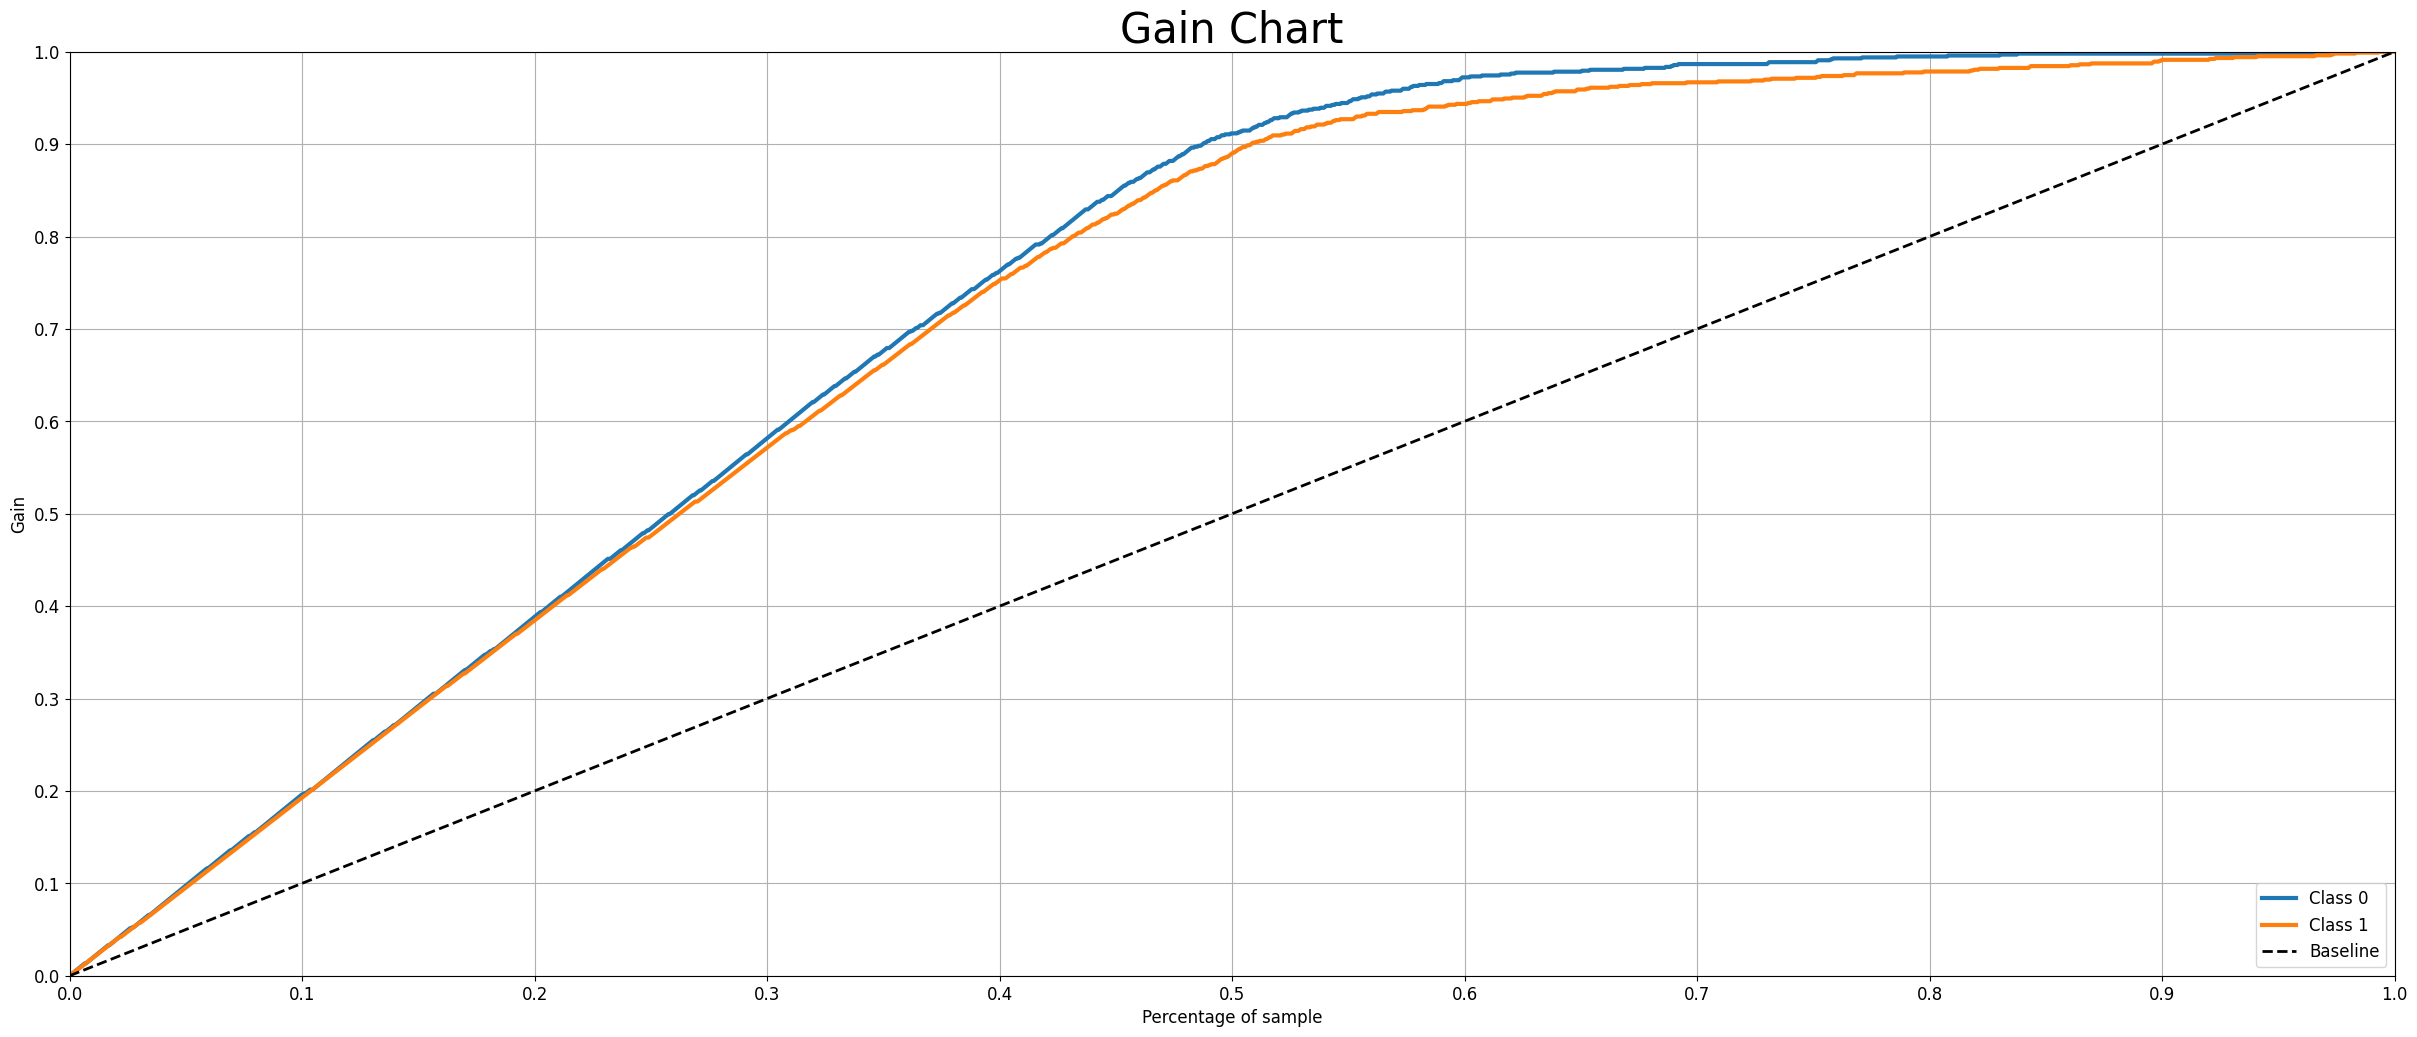

In [31]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_cumulative_gain(
    np.array(y_test),
    np.column_stack((y_pred_proba[:,0],1-y_pred_proba[:,0])),
    figsize=(30,12),
    title_fontsize=20,
    text_fontsize=12
)

plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,step=0.1))
plt.yticks(np.arange(0,1.1,step=0.1))
plt.title("Gain Chart", size=30),
plt.rc('lines', linewidth=1.5, color='r')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load a sample dataset (for example, the Iris dataset)
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target

df = data[data['target'] != 2]

# Split the data into features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
y_train.shape

(80,)

In [21]:
y_test.shape

(20,)

In [22]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test), dtype=torch.float32)

# Instantiate the SVM model, loss function, and optimizer
model = SVM()
criterion = nn.HingeEmbeddingLoss()  # Hinge loss for SVM
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Learning rate schedule
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.1)


# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), 2 * y_train_tensor - 1)  # Convert {0, 1} labels to {-1, 1}

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Learning rate schedule step
    # scheduler.step()

    # Print the loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model on the test set
# with torch.no_grad():
#     y_pred = model(X_test_tensor).sign().numpy()


# Evaluate the model on the test set
with torch.no_grad():
    y_pred = model(X_test_tensor).sign().numpy()
    y_pred_logits = model(X_test_tensor)
    y_pred_proba = torch.sigmoid(y_pred_logits)\

    
# Convert predictions to {0, 1} labels
y_pred = (1- y_pred )/ 2

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on Test Set: {accuracy:.4f}')

Epoch [10/100], Loss: 0.5150
Epoch [20/100], Loss: 0.2295
Epoch [30/100], Loss: -0.0561
Epoch [40/100], Loss: -0.3417
Epoch [50/100], Loss: -0.6136
Epoch [60/100], Loss: -0.7814
Epoch [70/100], Loss: -0.8956
Epoch [80/100], Loss: -0.9950
Epoch [90/100], Loss: -1.0910
Epoch [100/100], Loss: -1.1847
Accuracy on Test Set: 1.0000


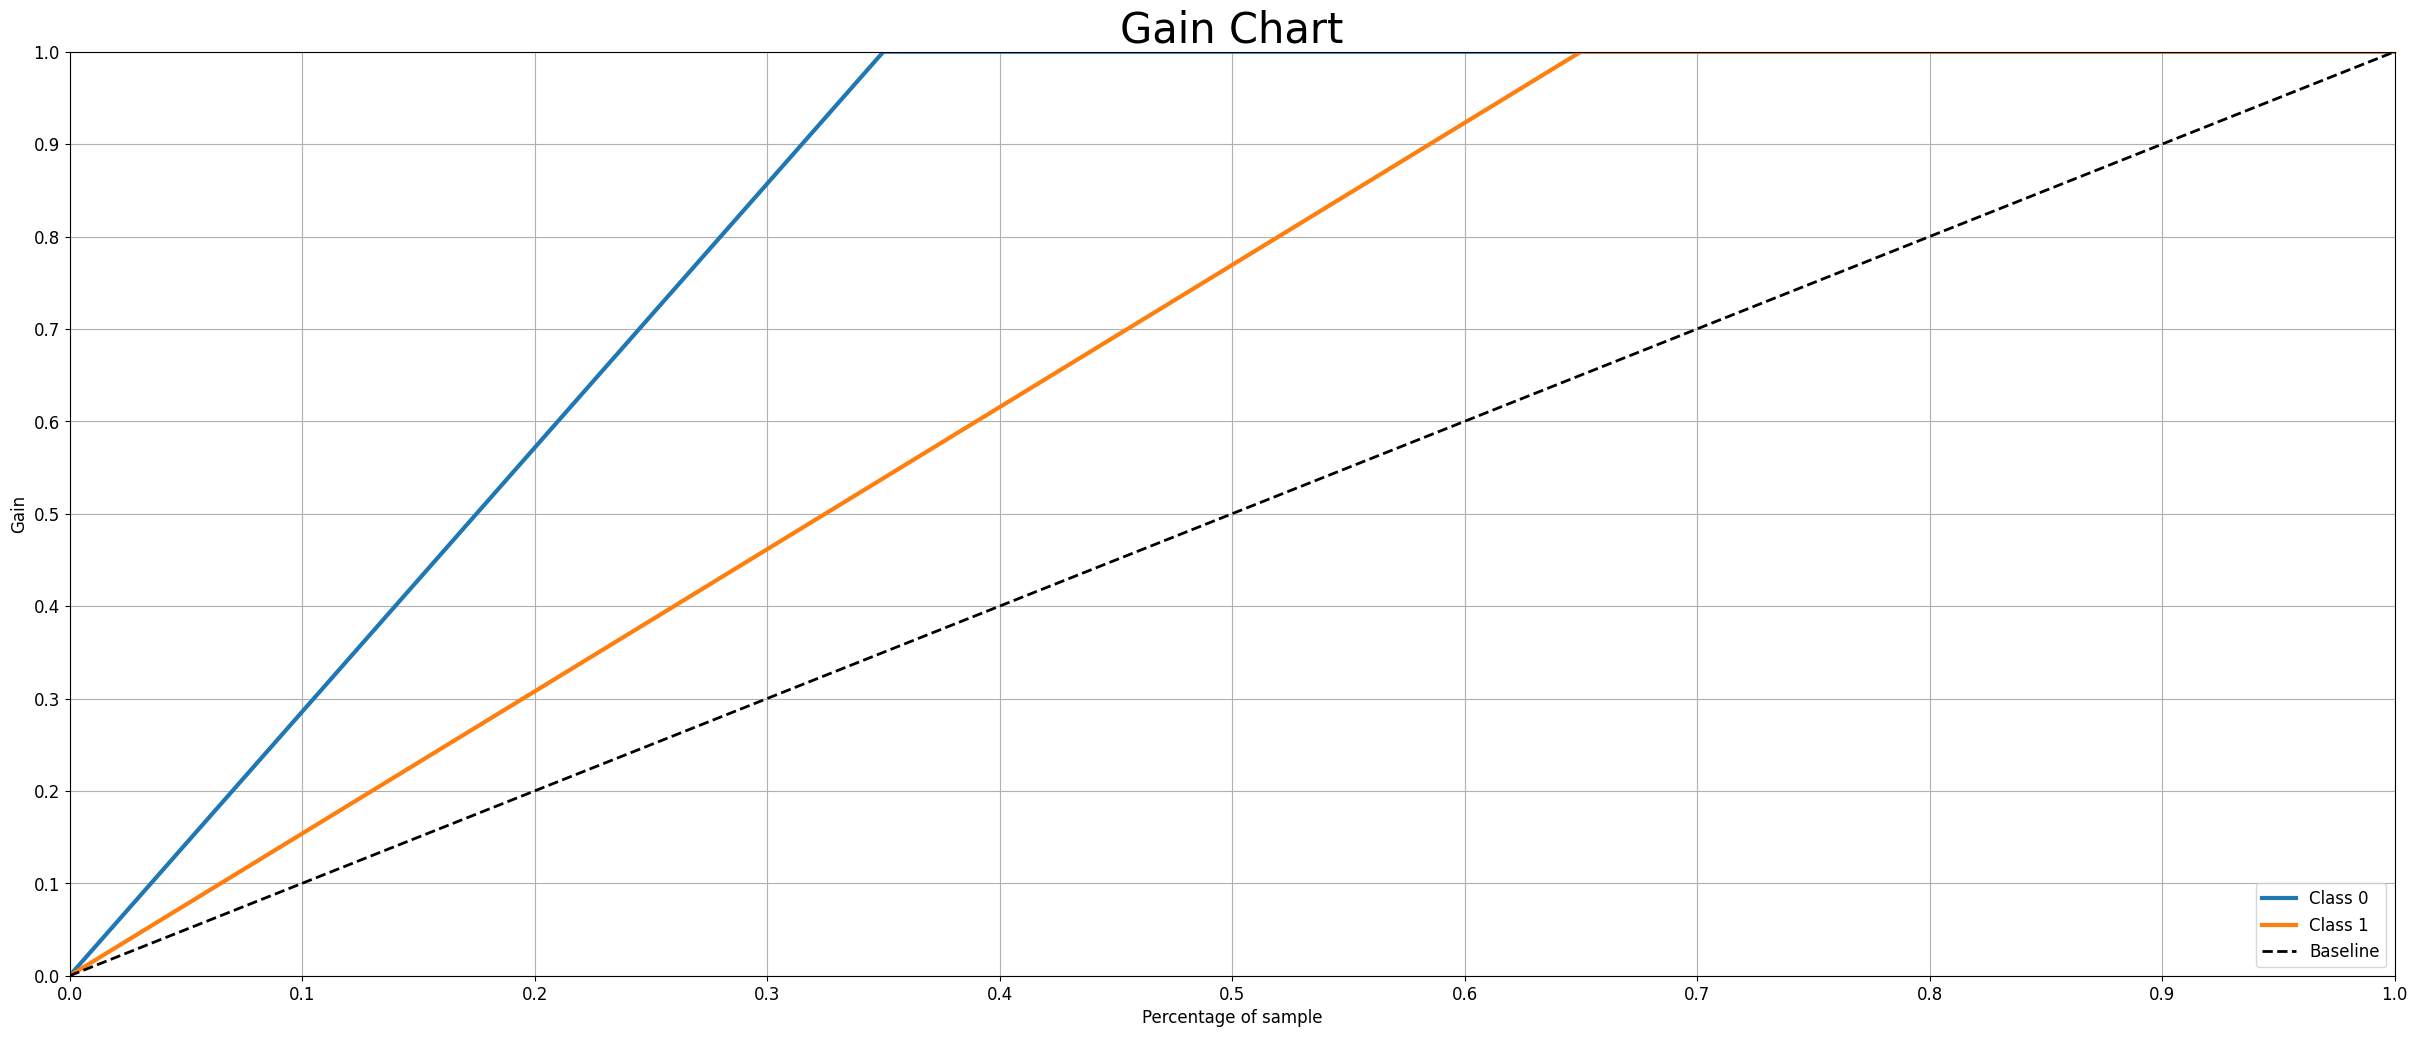

In [23]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_cumulative_gain(
    np.array(y_test),
    np.column_stack((y_pred_proba[:,0],1-y_pred_proba[:,0])),
    figsize=(30,12),
    title_fontsize=20,
    text_fontsize=12
)

plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,step=0.1))
plt.yticks(np.arange(0,1.1,step=0.1))
plt.title("Gain Chart", size=30),
plt.rc('lines', linewidth=1.5, color='r')
plt.show()

In [24]:
y_pred_proba.numpy()

array([[0.83547086],
       [0.8387676 ],
       [0.1391179 ],
       [0.0729267 ],
       [0.23663189],
       [0.03526792],
       [0.06245422],
       [0.81785727],
       [0.814169  ],
       [0.85071266],
       [0.8668602 ],
       [0.10449503],
       [0.04883726],
       [0.08220745],
       [0.04669349],
       [0.04754189],
       [0.0883042 ],
       [0.8028555 ],
       [0.08803986],
       [0.10725129]], dtype=float32)

In [129]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, log_loss

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM model with probability estimates
svm_model = SVC(probability=True)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions and probability estimates on the test set
y_pred = svm_model.predict(X_test)
y_proba = svm_model.predict_proba(X_test)

# Calculate accuracy and log loss
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Log Loss: {logloss:.4f}')


Accuracy: 0.8300
Log Loss: 0.4148
